In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao5"
CAND1_PATH = "data/paredao5/bianca.csv"
CAND2_PATH = "data/paredao5/flay.csv"
CAND3_PATH = "data/paredao5/prior.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]

# Bianca

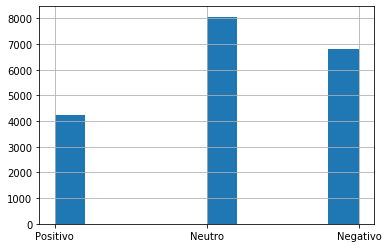

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,A maquiagem da @BiaAndradeOfc ameii quero tut...,Positivo
1,+235,Neutro
2,Vai boi kkkkkk,Neutro
3,@debs_debiju esse gif da @BiaAndradeOfc me de...,Positivo
4,bora gente!!! FOCOOOO @BiaAndradeOfc pic.twit...,Positivo
...,...,...
19103,Fora Felipe lixo,Negativo
19104,"Olha a ENQUETE da UOL, cai nessa viu, vamos de...",Negativo
19105,eu fiquei tão esperançoso @maridecanio :( pic....,Negativo
19106,nenhuma das duas votaram no agressor 🤔,Neutro


# Flay

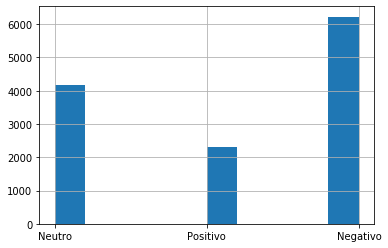

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,Iconic,Neutro
1,Meu coração tá leve que entre os três que eu a...,Positivo
2,"conceito, coesão e CUZÃO pic.twitter.com/RYZ9D...",Positivo
3,"Você é tudo, entenda!!!",Neutro
4,simplesmente a fantasia mais perfeitah 🥵,Positivo
...,...,...
12691,"Rafa deve vetar Flay ou Bianca, Guilherme e Pr...",Neutro
12692,FLAY:EU NÃO AGUENTO MAIS TOMAR NO CU CONTIGO B...,Negativo
12693,impossível gostar da flay #BBB20,Positivo
12694,Meu deus os trends hj tem o nome de todos os b...,Positivo


# Felipe Prior

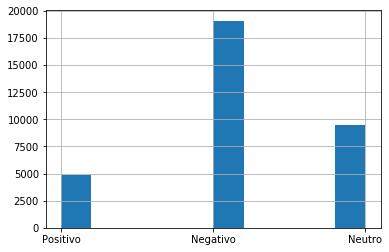

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,Meu coração tá leve que entre os três que eu a...,Positivo
1,Quem é fã do #bbb20 #redebbb e não de influenc...,Negativo
2,+900,Neutro
3,Fly emocionada 😭 \nAinda não acredito que meus...,Positivo
4,Finalmente...,Positivo
...,...,...
33410,Nao é possivel que vcs vão deixar o ridículo d...,Negativo
33411,A Paula do bbb19 torce pro Prior. Isso já teri...,Negativo
33412,#ForaBianca o Prior tem que sair no paredão co...,Negativo
33413,"Pra mim é tchau prior e é isso, 3 pessoas que ...",Positivo


# Quantidades absolutas

In [11]:
candidates = {"bianca_andrade": cand1, "flayslene": cand2, "felipe_prior": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,4239,8067,6802
flayslene,2304,4170,6222
felipe_prior,4887,9452,19076


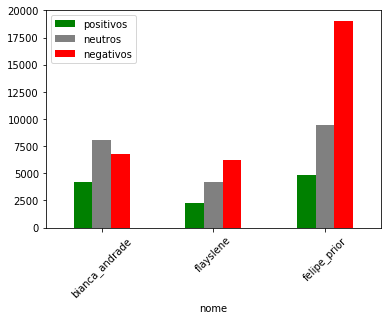

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,0.221844,0.422179,0.355977
flayslene,0.181474,0.328450,0.490076
felipe_prior,0.146252,0.282867,0.570881


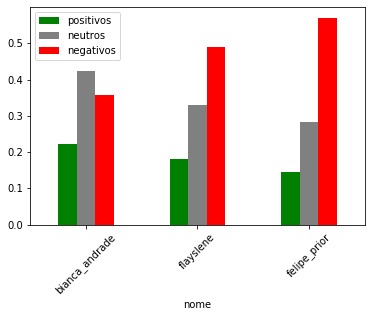

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,0.370866,0.371940,0.211900
flayslene,0.201575,0.192263,0.193832
felipe_prior,0.427559,0.435797,0.594268


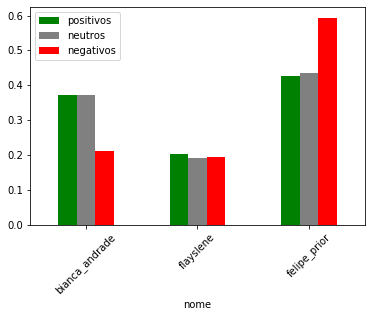

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [23]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [24]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [25]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [26]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [27]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,407828,0.5309
flayslene,2304,4170,6222,0.181474,0.328450,0.490076,99593,0.1764
felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,191901,0.2927


In [28]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))